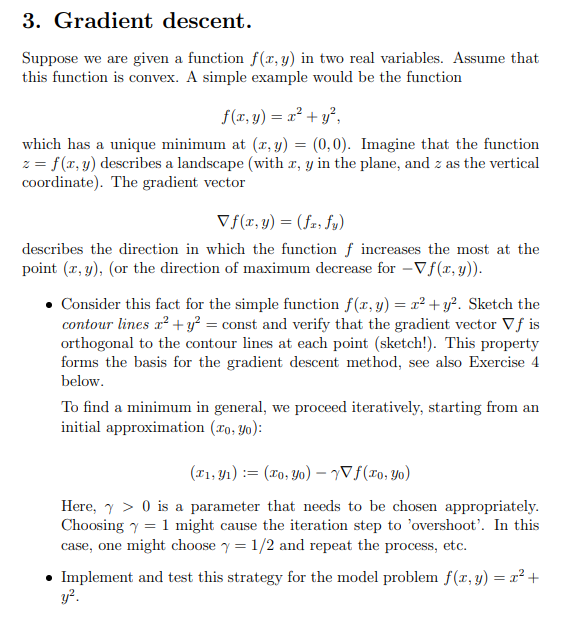

Was ist convex ?

Stelle dir den Graphen wie eine Schüssel vor.




In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, init_printing, symbols, latex, det, Eq
from sympy.abc import A
from IPython.display import display, Math

In [2]:
# Pre-requisites for pretty printing
init_printing()

In [4]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)
def format_dot_product(name, matrix1: Matrix, matrix2: Matrix):
    result = matrix1 * matrix2
    # Start LaTeX formatting
    latex_str = f"{name} = \\begin{{bmatrix}}\n"
    # Iterate over the result matrix to format each cell
    for i in range(result.rows):
        row_operations = []
        for j in range(result.cols):
            terms = []
            for k in range(matrix1.cols):
                terms.append(f"{latex(matrix1[i, k])} \\cdot {latex(matrix2[k, j]) if matrix2.shape[1] > 1 else latex(matrix2[k])}")
            operation = " + ".join(terms)
            row_operations.append(f"({operation})")
        latex_str += " & ".join(row_operations) + " \\\\\n"

    latex_str += "\\end{bmatrix} = " + latex(result)
    return result, latex_str

In [5]:
def gradient_descent(f, grad_f, x0, y0, gamma, tol=1e-6, max_iter=1000):
    """
    Gradient Descent implementation for a two-variable function.

    Parameters:
    - f: function to minimize
    - grad_f: gradient of the function
    - x0, y0: initial coordinates
    - gamma: learning rate
    - tol: tolerance for stopping criteria
    - max_iter: maximum iterations

    Returns:
    - x_hist, y_hist: lists of x and y coordinates over iterations
    """
    x, y = x0, y0
    x_hist, y_hist = [x], [y]
    for _ in range(max_iter):
        grad_x, grad_y = grad_f(x, y)
        x_new = x - gamma * grad_x
        y_new = y - gamma * grad_y

        # Stopping criteria
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            break

        x, y = x_new, y_new
        x_hist.append(x)
        y_hist.append(y)

    return x_hist, y_hist

In [6]:
# Define the function f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y

In [7]:
# Initial point and parameters
x0, y0 = 2.0, 2.0  # Starting at (2, 2)
gamma = 0.1         # Learning rate

In [8]:
# Perform gradient descent
x_hist, y_hist = gradient_descent(f, grad_f, x0, y0, gamma)

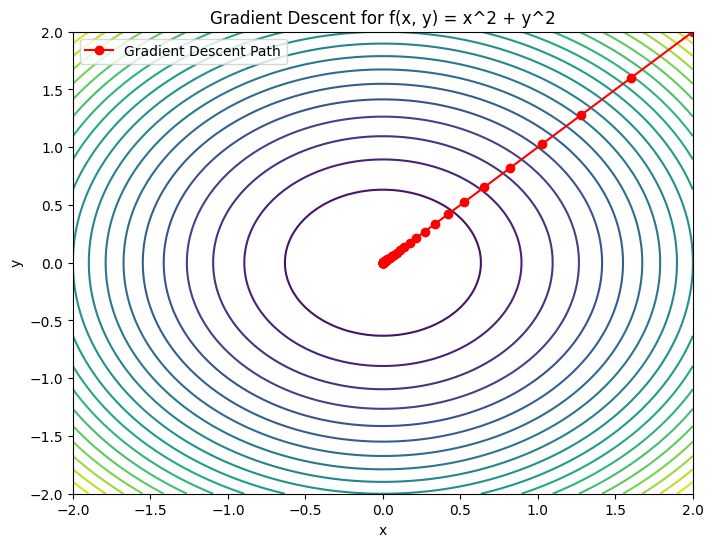

In [11]:
# Visualization
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.plot(x_hist, y_hist, 'ro-', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent for f(x, y) = x^2 + y^2")
plt.legend()
plt.show()

In [12]:
print(f"Converged to minimum at: x = {x_hist[-1]:.6f}, y = {y_hist[-1]:.6f}")

Converged to minimum at: x = 0.000003, y = 0.000003


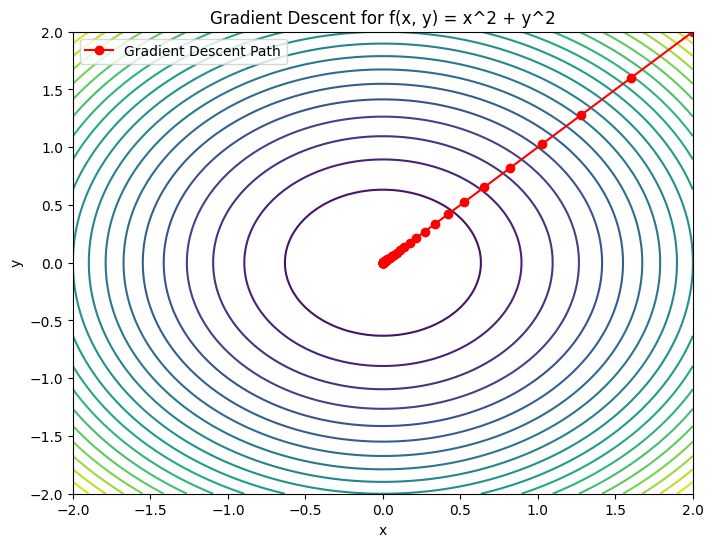

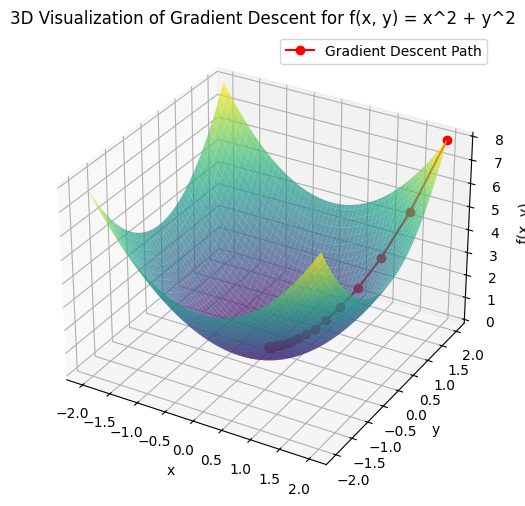

Converged to minimum at: x = 0.000003, y = 0.000003


In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, init_printing, symbols, latex, det, Eq
from sympy.abc import A
from IPython.display import display, Math

def gradient_descent(f, grad_f, x0, y0, gamma, tol=1e-6, max_iter=1000):
    """
    Gradient Descent implementation for a two-variable function.

    Parameters:
    - f: function to minimize
    - grad_f: gradient of the function
    - x0, y0: initial coordinates
    - gamma: learning rate
    - tol: tolerance for stopping criteria
    - max_iter: maximum iterations

    Returns:
    - x_hist, y_hist: lists of x and y coordinates over iterations
    """
    x, y = x0, y0
    x_hist, y_hist = [x], [y]
    for _ in range(max_iter):
        grad_x, grad_y = grad_f(x, y)
        x_new = x - gamma * grad_x
        y_new = y - gamma * grad_y

        # Stopping criteria
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            break

        x, y = x_new, y_new
        x_hist.append(x)
        y_hist.append(y)

    return x_hist, y_hist

# Define the function f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y

# Initial point and parameters
x0, y0 = 2.0, 2.0  # Starting at (2, 2)
gamma = 0.1         # Learning rate

# Perform gradient descent
x_hist, y_hist = gradient_descent(f, grad_f, x0, y0, gamma)

# Visualization
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# 2D Contour Plot
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.plot(x_hist, y_hist, 'ro-', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent for f(x, y) = x^2 + y^2")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

# 3D Surface Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7)
ax.plot(x_hist, y_hist, f(np.array(x_hist), np.array(y_hist)), 'ro-', label="Gradient Descent Path")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("3D Visualization of Gradient Descent for f(x, y) = x^2 + y^2")
plt.legend()
plt.show()

print(f"Converged to minimum at: x = {x_hist[-1]:.6f}, y = {y_hist[-1]:.6f}")
